In [2]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [3]:
import io
def get_curve(txt):
    out = io.BytesIO(txt)
    out.seek(0)
    return np.load(out)

In [4]:
# cesta k .db suboru - zmenit na spravnu cestu
FILEPATH = '/home/jovyan/data/lightning/data-upjs/detached_bellow_i_crit.db'
# vytvorenie connection na subor .db v sqllite formate
conn = sqlite3.connect(FILEPATH)

In [5]:
# nacitanie ake su tabulky v databaze (to len aby bolo jasne ako sa to zistit - realne su dve - parameters a curves)
sql_query = """SELECT name FROM sqlite_master WHERE type='table';"""
cursor = conn.cursor()
cursor.execute(sql_query)
print(cursor.fetchall())

[('parameters',), ('curves',), ('auxiliary',)]


In [6]:
df_parameters = pd.read_sql_query("SELECT id, overcontact FROM parameters", conn)



df_parameters.head()

,id,overcontact
0,29,0
1,88,0
2,158,0
3,234,0
4,334,0


In [7]:
df_parameters

,id,overcontact
0,29,0
1,88,0
2,158,0
3,234,0
4,334,0
...,...,...
78796,18628655,0
78797,18628668,0
78798,18628673,0
78799,18628674,0


In [8]:
# df_parameters = df_parameters.sample(10000)

In [9]:
df_parameters.shape

(78801, 2)

In [10]:
for col in df_parameters.columns:
    print(col)

id
overcontact


In [11]:
for i in df_parameters['overcontact']:
    if i == 1:
        print("som jeden")

In [12]:
df_curves = pd.read_sql_query("SELECT * FROM curves ORDER BY RANDOM() LIMIT 10000", conn)
conn.close()

In [13]:

df_curves.head(2)

,id,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,SLOAN_u,SLOAN_g,SLOAN_r,SLOAN_i,SLOAN_z,Kepler,GaiaDR2,TESS
0,16475486,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b""\x93NUMPY\x01\x00v\x00{'descr': '<f8', 'fort...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \..."
1,969061,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \..."


In [14]:
my_curve_values = np.frombuffer(df_curves["Bessell_U"][3000])
my_curve_values1 = get_curve(df_curves["Bessell_U"][3000])
print(my_curve_values)

[1.87585069e-309 1.17119999e+171 5.22741680e-037 8.44740097e+252
 2.65141232e+180 9.92152605e+247 2.16209968e+233 1.39938206e-076
 6.01399921e-154 6.01347002e-154 6.01347002e-154 6.01347002e-154
 6.01347002e-154 6.01347002e-154 6.01347002e-154 6.55490914e-260
 9.88652211e-001 9.88652253e-001 9.88652522e-001 9.88654317e-001
 9.88660018e-001 9.88665811e-001 9.88673017e-001 9.88681320e-001
 9.88693943e-001 9.88707286e-001 9.88719941e-001 9.88735779e-001
 9.88752495e-001 9.88771296e-001 9.88792876e-001 9.88814972e-001
 9.88836397e-001 9.88857100e-001 9.88881661e-001 9.88908763e-001
 9.88935610e-001 9.88962306e-001 9.88992288e-001 9.89022721e-001
 9.89053912e-001 9.89088347e-001 9.89122141e-001 9.89157188e-001
 9.89191537e-001 9.89227166e-001 9.89264645e-001 9.89303719e-001
 9.89345821e-001 9.89387149e-001 9.89428047e-001 9.89468583e-001
 9.89512267e-001 9.89558133e-001 9.89605419e-001 9.89654189e-001
 9.89702163e-001 9.89751362e-001 9.89799639e-001 9.89850817e-001
 9.89903706e-001 9.899564

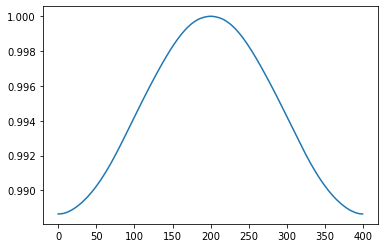

In [15]:
plt.plot(my_curve_values[16:])
plt.show()

In [16]:
row = df_curves.iloc[7800]
row_curves = row[1:]
my_curves = row_curves.apply(get_curve) 
print(my_curves)

Bessell_U    [0.8488391039343367, 0.8488504377061645, 0.848...
Bessell_B    [0.7027309492478716, 0.7027366730650424, 0.702...
Bessell_V    [0.7041586748307709, 0.7041589053996757, 0.704...
Bessell_R    [0.7249534231674287, 0.7249497937291086, 0.724...
Bessell_I    [0.7558210928626884, 0.7558110435159981, 0.755...
SLOAN_u      [0.8741797717187011, 0.8741919275569204, 0.874...
SLOAN_g      [0.6982781746108033, 0.6982821908785061, 0.698...
SLOAN_r      [0.7209697691055679, 0.7209669144250287, 0.720...
SLOAN_i      [0.7516942499673802, 0.7516862267287022, 0.751...
SLOAN_z      [0.7576287802850149, 0.7576165833955715, 0.757...
Kepler       [0.7149210183851461, 0.7149200779046639, 0.714...
GaiaDR2      [0.7192951260870792, 0.7192954370017023, 0.719...
TESS         [0.7405351492111895, 0.7405290415197959, 0.740...
Name: 7800, dtype: object


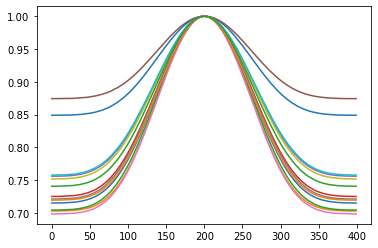

In [17]:
for c in my_curves:
    plt.plot(c)
    
plt.show()

In [18]:
df1 = df_curves[["id","Bessell_U", "Bessell_B", "Bessell_V", "Bessell_R", "Bessell_I"]]
df2 = df_parameters[["id", "overcontact"]]
df_merged = pd.merge(df1,df2,on="id")
df_merged["Bessell_U"] = df_merged["Bessell_U"].apply(get_curve)
df_merged["Bessell_V"] = df_merged["Bessell_V"].apply(get_curve)
df_merged["Bessell_R"] = df_merged["Bessell_R"].apply(get_curve)
df_merged["Bessell_I"] = df_merged["Bessell_I"].apply(get_curve)
df_merged["Bessell_B"] = df_merged["Bessell_B"].apply(get_curve)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           10000 non-null  int64 
 1   Bessell_U    10000 non-null  object
 2   Bessell_B    10000 non-null  object
 3   Bessell_V    10000 non-null  object
 4   Bessell_R    10000 non-null  object
 5   Bessell_I    10000 non-null  object
 6   overcontact  10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 625.0+ KB


In [19]:
df_merged.to_pickle("detached_bellow_i_crit_10000.pkl")

In [ ]:
df_merged_nacitany = pd.read_pickle("vyber.pkl")